In [39]:
#importing the required files
import pandas as pd

#Visualisation libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

In [40]:
#manipulating the default plot size 
plt.rcParams['figure.figsize']=10,12

In [41]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
#Reading the Datasets
df=pd.read_excel('Covid cases in India.xlsx')
df_india=df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [43]:
#Coordinates of India states and Union Territories 
India_coord=pd.read_excel('Indian Coordinates.xlsx')

#Day by Day data of India,Korea,Italy and Wuhan
dbd_India=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name="Wuhan")

# 1.2 Analysing COVID19 Cases in India

In [48]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases(Indian National + Foreign National)

df.drop(['S. No.'], axis=1,inplace=True)


In [49]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']


In [50]:
total_cases = df['Total cases'].sum()


In [51]:
print('Total number of confirmed COVID 2019 cases across India till date(22nd March,2020):',total_cases)

Total number of confirmed COVID 2019 cases across India till date(22nd March,2020): 562


In [52]:
#Highlight the dataframe

df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


# 1.3 Number of Active COVID-19 cases in affected State/Union Territories

In [54]:
#Total Active is the Total Cases - (Number of Deaths + cured)
df['Total Active']= df['Total cases']-(df['Death']+df['Cured'])

In [55]:
total_active=df['Total Active'].sum()

In [56]:
print('Total number of active COVID 2019 cases across India :', total_active)

Total number of active COVID 2019 cases across India : 512


In [58]:
Tot_Cases= df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()

In [59]:
Tot_Cases.style.background_gradient(cmap='Reds')

,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


# 1.4 Visualizing the spread geographically

In [60]:
#use folium to create a zoomable map
df_full=pd.merge(India_coord,df,on='Name of State / UT')

In [61]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

In [ ]:
for lat, lon, value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT'])
    folium.CircleMarker([lat, lon],radius=value*0.8, popup = ('<strong>State</strong>:' + str(name).capitalize()))

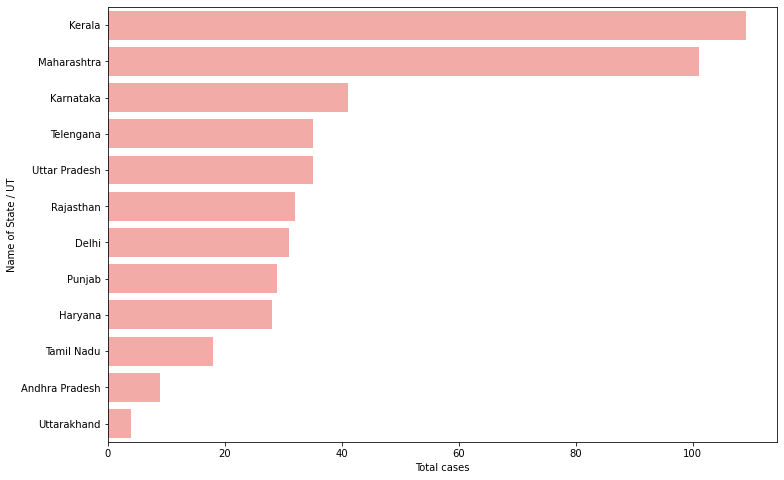

In [63]:
#use seaborn for visualization
f,ax = plt.subplots(figsize=(12,8))
data = df_full[['Name of State / UT','Total cases', 'Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases",y="Name of State / UT", data=data, label="Total",color="r")

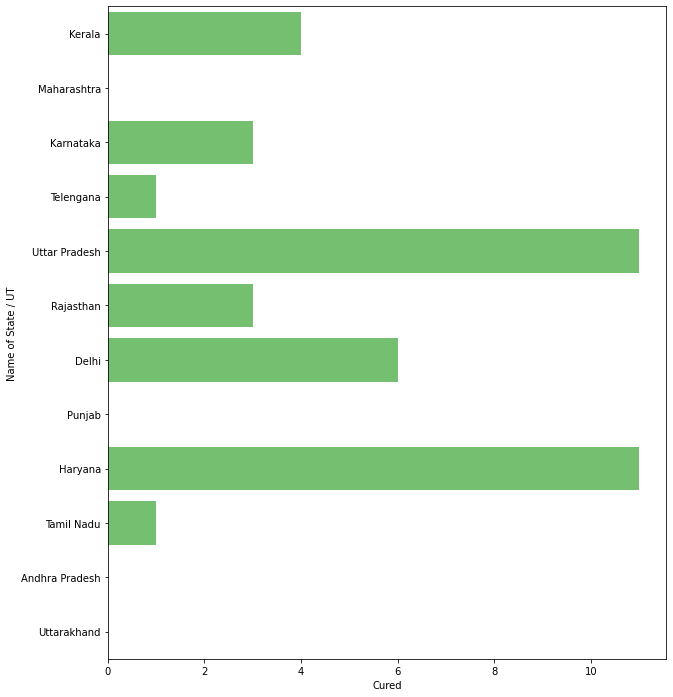

In [64]:
sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT", data=data, label="Cured",color="g")

In [66]:
#Add a legend and informative axis label
ax.legend(ncol=2,loc="lower right",frameon=True)
ax.set(xlim=(0,35),ylabel="",xlabel="Cases")
sns.despine(left=True,bottom=True)

<Figure size 720x864 with 0 Axes>

# 1.5 How the Coronavirus cases are rising 

In [67]:
#This cell's code is required
import plotly
plotly.io.renderers.default='colab'

In [68]:
#Learn how to create interactive graphs using plotly
#import plotly.graph objects as go
#Rise of COVID-19 cases in India
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers',name='Total cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India(Cumulative cases)', plot_bgcolor='rgb(230,230,230)')
fig.show()


In [69]:
#New COVID-19 cases reported daily in India
import plotly.express as px
fig=px.bar(dbd_India,x="Date",y="New Cases",barmode="group", height=400)
fig.update_layout(title_text="Coronavirus Cases in India on daily basis",plot_bgcolor='rgb(230,230,230)')

fig.show()

# Part 2 : Is the trend similar to Italy/S.Korea/Wuhan?

In [72]:
# import plotly.express as px'
fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed cases in India',color_discrete_sequence=px.colors.cyclical.IceFire)

In [73]:
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [74]:
fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed cases in South Korea',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [75]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed cases in Italy',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [76]:
fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed cases in Wuhan',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [78]:
#import plotly.graph_object as go

title='Main Source for News'
labels=['S.korea','Italy','India']
colors=['rgb(122,128,0)','rgb(255,0,0)','rgb(49,130,189)']

mode_size = [10,10,12]
line_size=[1,1,8]

fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],y=dbd_Korea['Total Cases'],mode='lines',name=labels[0],
                         line=dict(color=colors[0],width=line_size[0]),connectgaps=True))

In [79]:
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'],y=dbd_Italy['Total Cases'],mode='lines',name=labels[1],
                         line=dict(color=colors[1],width=line_size[1]),connectgaps=True))

In [80]:
fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],y=dbd_India['Total Cases'],mode='lines',name=labels[2],
                         line=dict(color=colors[2],width=line_size[2]),connectgaps=True))

# Part 3 : Exploring World Wide Data

In [83]:
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [84]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)

In [85]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [87]:
df2=df.groupby(["Date","Country","Province/State"])[['Date','Province/State','Country','Confirmed','Deaths','Recovered']]
df2.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,NaN,Thailand,2.0,0.0,0.0
1,2020-01-22,NaN,Japan,2.0,0.0,0.0
2,2020-01-22,NaN,Singapore,0.0,0.0,0.0
3,2020-01-22,NaN,Nepal,0.0,0.0,0.0
4,2020-01-22,NaN,Malaysia,0.0,0.0,0.0
...,...,...,...,...,...,...
19191,2020-03-23,Sint Maarten,Netherlands,1.0,0.0,0.0
19194,2020-03-23,Isle of Man,United Kingdom,5.0,0.0,0.0
19196,2020-03-23,Northwest Territories,Canada,1.0,0.0,0.0
19210,2020-03-23,United States Virgin Islands,US,6.0,0.0,0.0


In [88]:
#Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [89]:
#Overall worldwide Confirmed/Deaths/Recovered Cases
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


# 3.1 Visualizing : Worldwide NCOVID-19 Cases

In [90]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()


In [ ]:
fig=go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color="Red")))
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Deaths'],mode='lines+markers',name='Confirmed',line=dict(color="Red")))
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Recovered'],mode='lines+markers',name='Confirmed',line=dict(color="Red")))
fig.update_layout(title='Worldwide NCOVID-19 Cases',xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

# Part 4 : Forecasting Total Number of Cases Worldwide

In [91]:
 #use prophet
 from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [92]:
pip install fbprophet

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\utkar\\AppData\\Local\\Temp\\pip-install-ebgag7xo\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\utkar\\AppData\\Local\\Temp\\pip-install-ebgag7xo\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\utkar\AppData\Local\Temp\pip-wheel-2drqcgk0'
       cwd: C:\Users\utkar\AppData\Local\Temp\pip-install-ebgag7xo\fbprophet\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\utkar\AppData\Local\Temp\pip-install-ebgag7xo\fb

      self.distribution.run_command(command)
    File "C:\ProgramData\Anaconda3\lib\distutils\dist.py", line 985, in run_command
      cmd_obj.run()
    File "C:\ProgramData\Anaconda3\lib\distutils\command\build.py", line 135, in run
      self.run_command(cmd_name)
    File "C:\ProgramData\Anaconda3\lib\distutils\cmd.py", line 313, in run_command
      self.distribution.run_command(command)
    File "C:\ProgramData\Anaconda3\lib\distutils\dist.py", line 985, in run_command
      cmd_obj.run()
    File "C:\Users\utkar\AppData\Local\Temp\pip-install-ebgag7xo\fbprophet\setup.py", line 48, in run
      build_models(target_dir)
    File "C:\Users\utkar\AppData\Local\Temp\pip-install-ebgag7xo\fbprophet\setup.py", line 36, in build_models
      from fbprophet.models import StanBackendEnum
    File "C:\Users\utkar\AppData\Local\Temp\pip-install-ebgag7xo\fbprophet\fbprophet\__init__.py", line 8, in <module>
      from fbprophet.forecaster import Prophet
    File "C:\Users\utkar\AppData\Local\T

  Running setup.py clean for fbprophet
  Created wheel for holidays: filename=holidays-0.10.3-py3-none-any.whl size=115859 sha256=fd7138e6e315f63f83ea738a79b868137085e6926eadf57d0bd2c4368ecece93
  Stored in directory: c:\users\utkar\appdata\local\pip\cache\wheels\a2\97\85\fd3fe9e0f96120582caa3470bde6652f826b4e5842e3cce65c
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-py3-none-any.whl size=702883 sha256=7aca9d9613b8247cdf3396fe57e795f741f5dc0e16da5f75693cb8cbc602ae57
  Stored in directory: c:\users\utkar\appdata\local\pip\cache\wheels\5a\68\50\d989a005ecd4f58a7922bede25ff7e391d66395a3090acf97a
Successfully built holidays pymeeus
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


In [93]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [94]:
conda install fbprophet

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - fbprophet

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
from fbprophet import Prophet

In [96]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()


In [97]:
confirmed.columns=['ds','y']
#confirmed['ds']=confirmed['ds'].dt.date
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [98]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [ ]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
#predicting future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
confirmed_forecast_plot=m.plot(forecast)

In [ ]:
confirmed_forecast_plot=m.plot_components(forecast)

In [ ]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()
#predicting future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


In [ ]:
m=Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()
#predicting future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()